In [4]:
%matplotlib inline

import copy
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

In [5]:
def uniform(phi):
    while True:
        yield npr.rand() * phi
        
def normal(phi, stdev):
    while True:
        yield npr.normal(phi * 0.5, stdev)
        
def perlin(phi, octaves):
    amp_sum = sum([amp for (_, amp) in octaves])
    octaves = [(period, amp * phi / amp_sum) for (period, amp) in octaves]
    
    rands = np.array([
        npr.rand() * amp
        for (_, amp) in octaves
    ])
    dts = np.array([0.0 for _ in octaves])
    ticks = np.array([0 for _ in octaves])
    
    while True:
        for i in range(len(octaves)):
            if ticks[i] == 0:
                (period, amp) = octaves[i]
                
                dts[i] = (npr.rand() * amp - rands[i]) / float(period)
                
                ticks[i] = period

        ticks -= 1
        rands += dts
        yield rands.sum()
        
def randwalk(phi, step_scale):
    p = npr.rand() * phi
    
    while True:
        dp = (npr.rand() - 0.5) * phi * step_scale
        v = p + dp
        
        if v > phi or v < 0.0:
            v = p - dp
            
        p = v
        yield p

/tmp/ipykernel_506104/1668020694.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


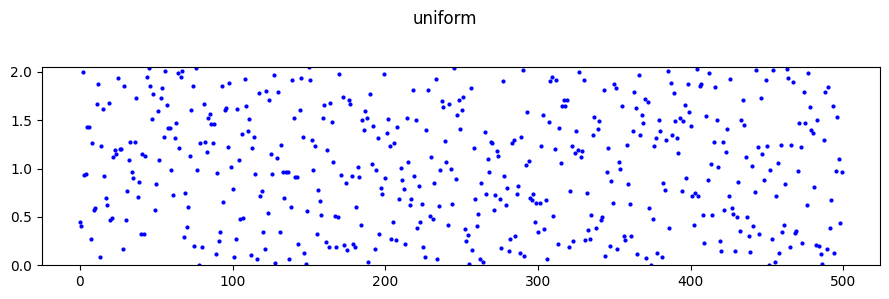

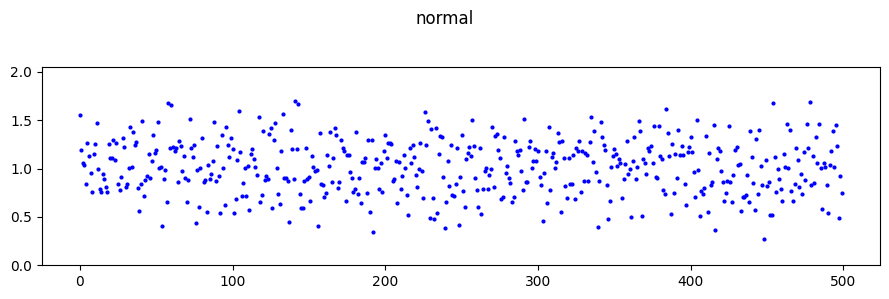

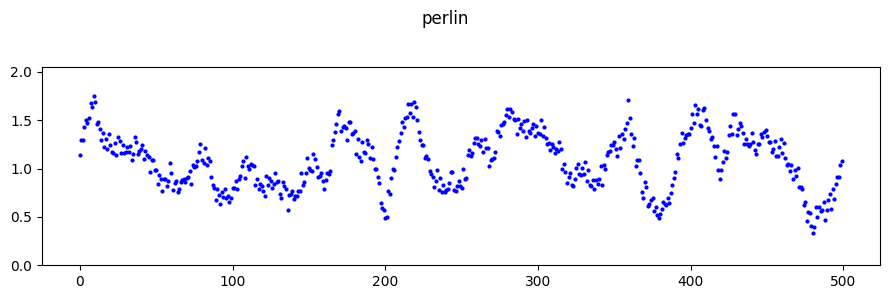

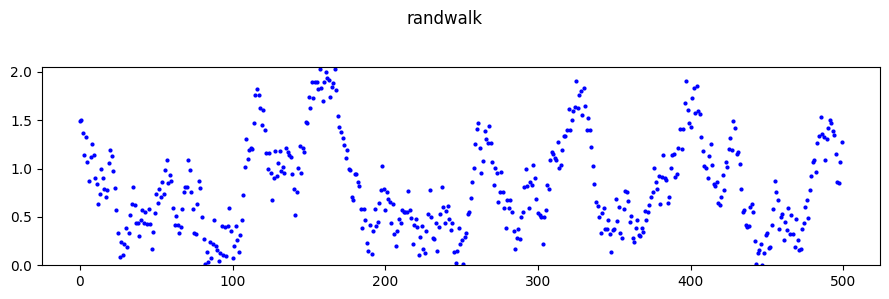

In [6]:
generators = [
    ('uniform', lambda: uniform(2.05)),
    ('normal', lambda: normal(2.05, 0.3)),
    ('perlin', lambda: perlin(2.05, [(20, 0.7), (10, 0.3), (5, 0.15), (1, 0.15)])),
    ('randwalk', lambda: randwalk(2.05, 0.3)),
]

max_iters = 500
for (name, gen_f) in generators:
    gen = gen_f()
    x = list(range(max_iters))
    y = [next(gen) for _ in x]
    
    fig, ax = plt.subplots(figsize=(9, 3))
    fig.suptitle(name)
    
    ax.plot(x, y, 'bo', linewidth=1, markersize=2)
    ax.set_ylim(0.0, 2.05)
    
    fig.tight_layout(rect=(0, 0, 1, 0.95))
    fig.show()
    fig.savefig('graphs/rand_%s.png' % name)

In [11]:
def demo_pso(name, iters, lbest, pbest, start, particles, gen_f):
    lbest = np.array(lbest, dtype=np.float64)
    pbest = np.array(pbest, dtype=np.float64)
    ppos = [np.array(start, dtype=np.float64) for _ in range(particles)]
    pvel = [np.zeros(len(start), dtype=np.float64) for _ in range(particles)]
    pgen = [(gen_f(), gen_f()) for _ in range(particles)]
    
    pos_hist = [copy.deepcopy(ppos)]
    
    for _ in range(iters):
        for i in range(particles):
            pvel[i] += (lbest - ppos[i]) * next(pgen[i][0]) + (pbest - ppos[i]) * next(pgen[i][1])
            pvel[i] *= 0.1
            ppos[i] += pvel[i]

        pos_hist.append(copy.deepcopy(ppos))

    fig, ax = plt.subplots(figsize=(9, 3))
    fig.suptitle(name)
    
    ax.plot(lbest[0], lbest[1], 'ro', label='local best')
    ax.plot(pbest[0], pbest[1], 'bo', label='personal best')
    
    for i in range(particles):
        x = [ppos[i][0] for ppos in pos_hist]
        y = [ppos[i][1] for ppos in pos_hist]
        
        ax.plot(x, y, 'o-', linewidth=1, markersize=3)
    
    fig.legend()
    fig.tight_layout(rect=(0, 0, 1, 0.95))
    fig.show()
    fig.savefig('graphs/pso_%s.png' % name)

/tmp/ipykernel_506104/2561663432.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


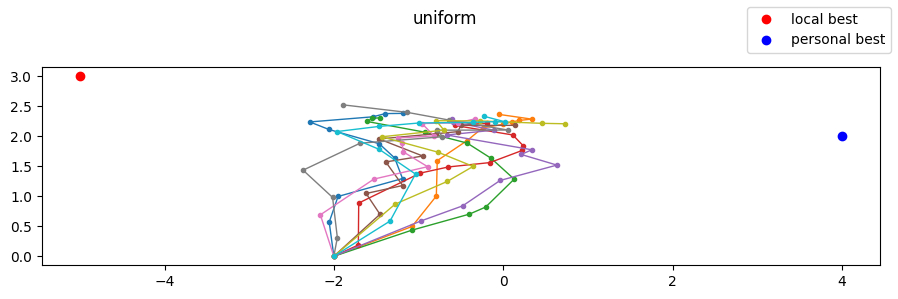

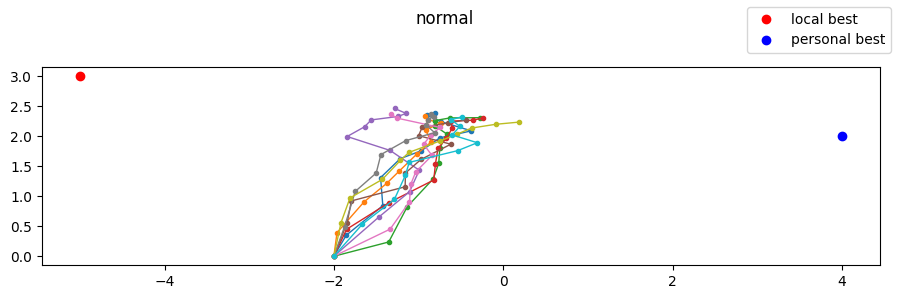

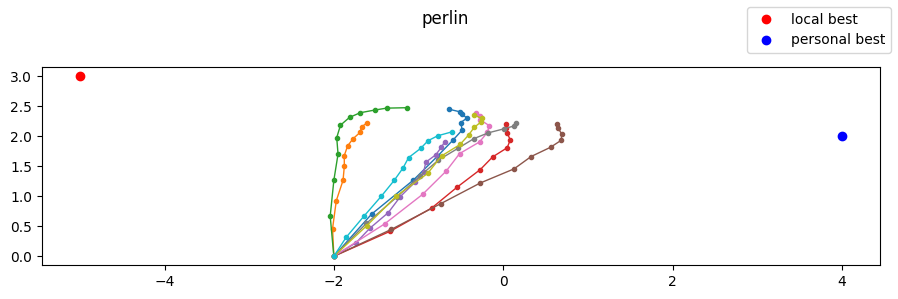

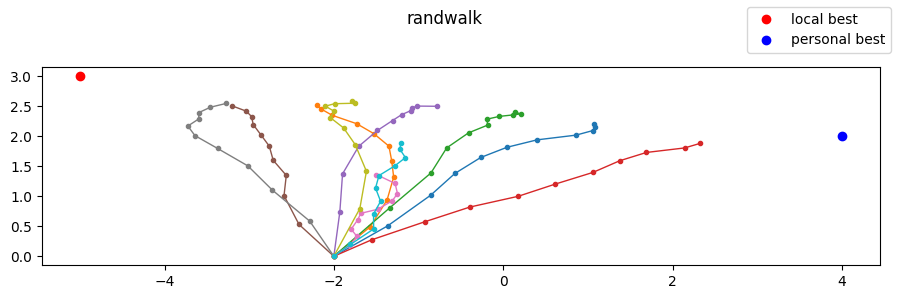

In [12]:
for (name, gen_f) in generators:
    demo_pso(name, 10, (-5, 3), (4, 2), (-2, 0), 10, gen_f)